<a href="https://colab.research.google.com/github/MerveCirak1930/Urban_Sounds_Classification/blob/main/DLson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the required libraries


In [ ]:
# connection between Google Colab and Google Drive
from google.colab import drive    # we used spectograms and UrbanSound8K.csv in Google Drive
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import librosa            #allows us to read audio files (files such as mp3, wav).
import librosa.display    #converting the audio files to pictures

import cv2                #Allows you to manipulate images(in this project, spectograms are our images)
from google.colab.patches import cv2_imshow

import tensorflow as tf

import sys

# Loading of Dataset

In [ ]:
#We are connected to the root directory on drive
drive.mount("/content/drive")

Mounted at /content/drive


### Reading csv file from our Drive

In [ ]:
df=pd.read_csv("/content/drive/My Drive/UrbanSoundClassificationwithDL/UrbanSound8K.csv")
df.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


### Access to spectrogram files from our Drive

In [ ]:
our_spectrograms = "/content/drive/My Drive/UrbanSoundClassificationwithDL/spectrograms"

# Preprocessing  -  Notebook

In [ ]:
image_array = []
label_array = []

for label in range(10):
  # All files in the label folders were appointed to a list.We started from the label folder called 0.
  images = os.listdir(our_spectrograms+"/"+str(label))  

  # Check all images in the label folder via 'For' loop.
  for image in range(len(images)):

    #grayscale transform
    img_gray=cv2.imread(our_spectrograms+"/"+str(label)+"/"+images[image],0) 

    #resizing
    resized_gray = cv2.resize(img_gray, (100,100) , interpolation = cv2.INTER_AREA)

    #normalization
    normalized_gray=resized_gray/255 # Assign all pixel values between 0-1

    image_array.append(normalized_gray) #Add the processed image to the X list.
    label_array.append(label) #Add the label of the processed image to the y list.

In [ ]:
len(images)

1000

In [ ]:
print(len(image_array))
print(len(label_array))

8732
8732


In [ ]:
print(label_array[0])
print(label_array[500])
print(label_array[1000])
print(label_array[1500])
print(label_array[2000])
print(label_array[3500])
print(label_array[4500])
print(label_array[5500])
print(label_array[6500])
print(label_array[7500])
print(label_array[8500])

0
0
1
2
2
4
5
6
7
8
9


In [ ]:
import random

def shuffle(image_array,label_array):
  z = list(zip(image_array, label_array))
  random.shuffle(z)
  image_array, label_array = zip(*z)
  return image_array, label_array

In [ ]:
image_array , label_array = shuffle(image_array, label_array)

In [ ]:
from sklearn.model_selection import train_test_split    #splitting data into train, test
X_train, X_test, y_train, y_test = train_test_split(image_array, label_array, test_size=0.15, random_state=42)

In [ ]:
X_train,x_val,y_train,y_val= train_test_split(X_train, y_train, test_size=0.25, random_state=42)    #splitting data into train, value

In [ ]:
type(X_train)

list

In [ ]:
X_train = np.array(X_train )
X_test = np.array(X_test )
X_val=np.array(x_val)

y_train = np.array(y_train )
y_test= np.array(y_test )
y_val=np.array(y_val)

In [ ]:
type(X_test)

numpy.ndarray

In [ ]:
print(f"Len of X_train:{len(X_train)}")
print(f"Len of X_test:{len(X_test)}")
print(f"Len of X_val:{len(X_val)}")

print(f"Len of y_train:{len(y_train)}")
print(f"Len of y_test:{len(y_test)}")
print(f"Len of y_val:{len(y_val)}")

Len of X_train:5566
Len of X_test:1310
Len of X_val:1856
Len of y_train:5566
Len of y_test:1310
Len of y_val:1856


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(5566, 100, 100)
(1310, 100, 100)
(1856, 100, 100)
(5566,)
(1310,)
(1856,)


# Preparing and Training of Model  - Notebook

In [ ]:
numberOfClass= y_train.shape[0]  

from keras.models import Sequential       # Basic Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization   # Cnn layers
from keras.preprocessing.image import ImageDataGenerator

# Create model 
model= Sequential()

# first layer
model.add(Conv2D(input_shape=(100,100,1), filters=32, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())


# second layer
model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

# The input_shape does not need to be specified again. It was received in the first layer.

# third layer
model.add(Conv2D(filters=128, kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())

# Flattening the layers and adding the output layer 
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(units=512))
model.add(Activation("relu"))
model.add(Dense(units=250))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(units=numberOfClass))
model.add(Activation("softmax"))

# Compiling the model
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

# Training the model
hist= model.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=50, batch_size=32)

Epoch 1/50
174/174 [==============================] - 131s 746ms/step - loss: 1.5741 - accuracy: 0.4910 - val_loss: 2.9785 - val_accuracy: 0.1433
Epoch 2/50
174/174 [==============================] - 134s 772ms/step - loss: 0.8699 - accuracy: 0.7063 - val_loss: 3.5393 - val_accuracy: 0.1579
Epoch 3/50
174/174 [==============================] - 131s 755ms/step - loss: 0.6601 - accuracy: 0.7828 - val_loss: 1.5898 - val_accuracy: 0.5011
Epoch 4/50
174/174 [==============================] - 130s 749ms/step - loss: 0.5309 - accuracy: 0.8216 - val_loss: 0.9950 - val_accuracy: 0.6778
Epoch 5/50
174/174 [==============================] - 132s 758ms/step - loss: 0.4210 - accuracy: 0.8586 - val_loss: 0.5851 - val_accuracy: 0.8082
Epoch 6/50
174/174 [==============================] - 132s 756ms/step - loss: 0.3351 - accuracy: 0.8857 - val_loss: 0.7463 - val_accuracy: 0.7904
Epoch 7/50
174/174 [==============================] - 131s 755ms/step - loss: 0.2463 - accuracy: 0.9166 - val_loss: 0.6897 -

In [ ]:
model.save_weights("urban_sounds_record.h5")  # modelin sonuçlarını h5 dosyasına kaydettim

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


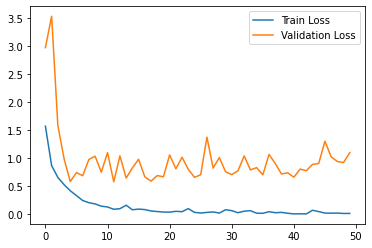

In [ ]:
print(hist.history.keys())
plt.plot(hist.history["loss"],label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

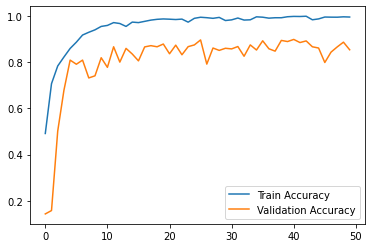

In [ ]:
plt.figure()
plt.plot(hist.history["accuracy"], label="Train Accuracy")
plt.plot(hist.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
# history grafiklerini kaydettim

import json 
with open('urban_sounds_record.json','w')as f:
    json.dump(hist.history,f)

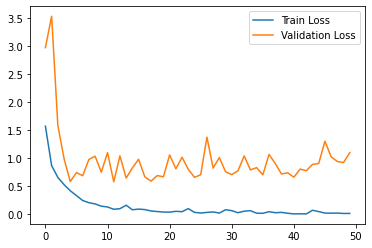

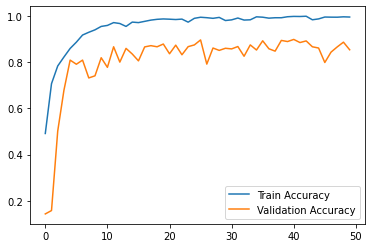

In [ ]:
# history grafiklerini tekrar görüntüledim

import codecs
with codecs.open("urban_sounds_record.json",'r', encoding='utf-8') as f:
     h= json.loads(f.read())

plt.figure()
plt.plot(h["loss"], label="Train Loss")
plt.plot(h["val_loss"], label="Validation Loss")
plt.legend()
plt.show()
plt.figure()
plt.plot(h["accuracy"], label="Train Accuracy")
plt.plot(h["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()